<a href="https://colab.research.google.com/github/parul2712/ML-LAB/blob/main/MLexp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Iris (1).csv to Iris (1) (1).csv


In [6]:
df = pd.read_csv("Iris (1).csv")

In [7]:
features = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]
X = df[features].values

In [8]:
mean_vector = np.mean(X, axis=0)
print("\n🔹 Mean Vector:", mean_vector)
centered_data = X - mean_vector
print("\n🔹 Centered Data (After Mean Subtraction):\n", pd.DataFrame(centered_data, columns=features))


🔹 Mean Vector: [5.84333333 3.054      3.75866667 1.19866667]

🔹 Centered Data (After Mean Subtraction):
      SepalLength  SepalWidth  PetalLength  PetalWidth
0      -0.743333       0.446    -2.358667   -0.998667
1      -0.943333      -0.054    -2.358667   -0.998667
2      -1.143333       0.146    -2.458667   -0.998667
3      -1.243333       0.046    -2.258667   -0.998667
4      -0.843333       0.546    -2.358667   -0.998667
..           ...         ...          ...         ...
145     0.856667      -0.054     1.441333    1.101333
146     0.456667      -0.554     1.241333    0.701333
147     0.656667      -0.054     1.441333    0.801333
148     0.356667       0.346     1.641333    1.101333
149     0.056667      -0.054     1.341333    0.601333

[150 rows x 4 columns]


In [9]:
cov_matrix = np.cov(centered_data, rowvar=False)
print("\n🔹 Covariance Matrix:\n", pd.DataFrame(cov_matrix, index=features, columns=features))


🔹 Covariance Matrix:
              SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     0.685694   -0.039268     1.273682    0.516904
SepalWidth     -0.039268    0.188004    -0.321713   -0.117981
PetalLength     1.273682   -0.321713     3.113179    1.296387
PetalWidth      0.516904   -0.117981     1.296387    0.582414


In [10]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print("\n🔹 Eigenvalues:\n", eig_values)
print("\n🔹 Eigenvectors:\n", pd.DataFrame(eig_vectors, index=features, columns=["PC1", "PC2", "PC3", "PC4"]))


🔹 Eigenvalues:
 [4.22484077 0.24224357 0.07852391 0.02368303]

🔹 Eigenvectors:
                   PC1       PC2       PC3       PC4
SepalLength  0.361590 -0.656540 -0.580997  0.317255
SepalWidth  -0.082269 -0.729712  0.596418 -0.324094
PetalLength  0.856572  0.175767  0.072524 -0.479719
PetalWidth   0.358844  0.074706  0.549061  0.751121


In [11]:
sorted_indices = np.argsort(eig_values)[::-1]
eig_values = eig_values[sorted_indices]
eig_vectors = eig_vectors[:, sorted_indices]

In [12]:
principal_components = centered_data @ eig_vectors[:, :2]

df_pca = pd.DataFrame(principal_components, columns=["PC1", "PC2"])
df_pca["Species"] = df["Species"]
print("\n🔹 Principal Components (First Two):\n", df_pca)


🔹 Principal Components (First Two):
           PC1       PC2         Species
0   -2.684207 -0.326607     Iris-setosa
1   -2.715391  0.169557     Iris-setosa
2   -2.889820  0.137346     Iris-setosa
3   -2.746437  0.311124     Iris-setosa
4   -2.728593 -0.333925     Iris-setosa
..        ...       ...             ...
145  1.944017 -0.187415  Iris-virginica
146  1.525664  0.375021  Iris-virginica
147  1.764046 -0.078519  Iris-virginica
148  1.901629 -0.115877  Iris-virginica
149  1.389666  0.282887  Iris-virginica

[150 rows x 3 columns]


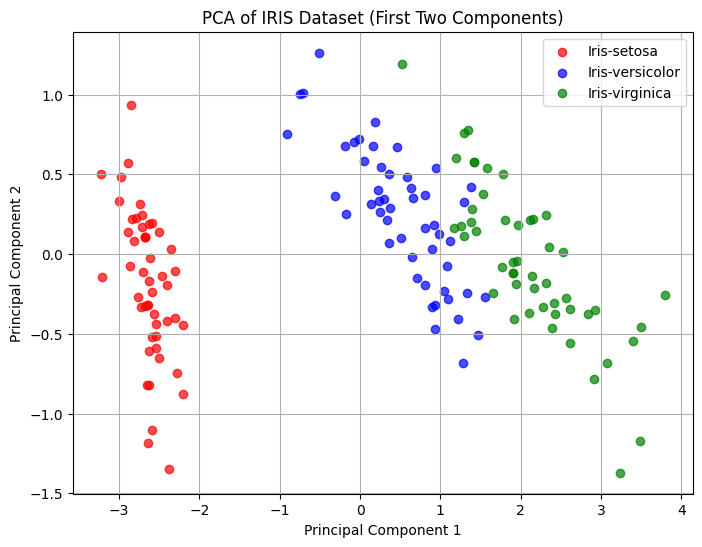

In [13]:
plt.figure(figsize=(8, 6))
species_colors = {"Iris-setosa": "red", "Iris-versicolor": "blue", "Iris-virginica": "green"}

for species, color in species_colors.items():
    subset = df_pca[df_pca["Species"] == species]
    plt.scatter(subset["PC1"], subset["PC2"], label=species, color=color, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of IRIS Dataset (First Two Components)")
plt.legend()
plt.grid(True)
plt.show()